In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [2]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
for i in df.columns:
    print(i)

Car_Name
Year
Selling_Price
Present_Price
Kms_Driven
Fuel_Type
Seller_Type
Transmission
Owner


In [5]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [6]:
##check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [9]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


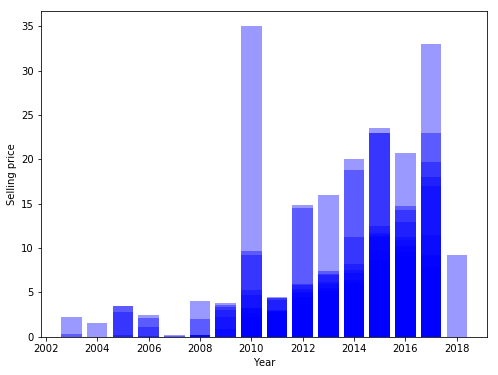

In [10]:
# showing the selling price based on Year
plt.figure(1, figsize=(8, 6))
plt.bar(final_dataset.Year,final_dataset.Selling_Price, color='blue',alpha=0.4)
plt.xlabel("Year")
plt.ylabel("Selling price")
plt.show()

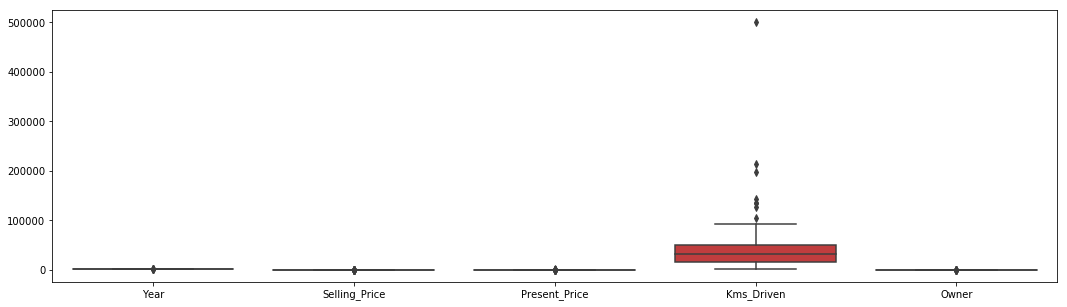

In [11]:
plt.figure(figsize = (18,5))
sn.boxplot(data=final_dataset)
plt.show()

from the boxplot we can see that kms_Driven has outliers

In [12]:
q1 = final_dataset['Kms_Driven'].quantile(0.25)
q3 = final_dataset['Kms_Driven'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print(f"IQR: {iqr}, UL: {UL}, LL: {LL}")

IQR: 33767.0, UL: 99417.5, LL: -35650.5


In [13]:
final_dataset[final_dataset['Kms_Driven']>UL]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
50,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
179,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


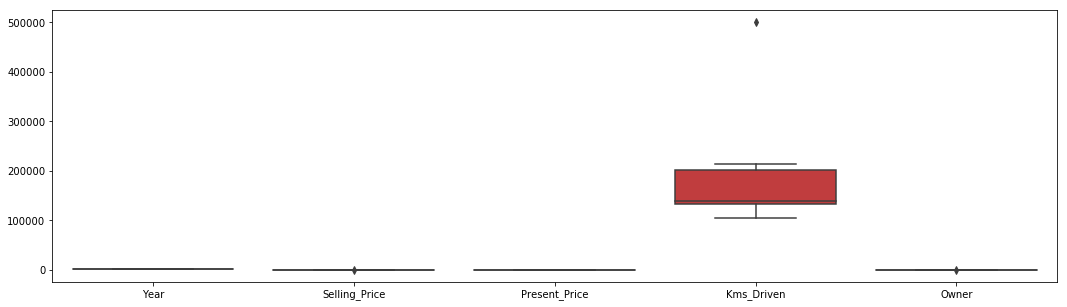

In [14]:
plt.figure(figsize = (18,5))
sn.boxplot(data=final_dataset[final_dataset['Kms_Driven']>UL])
plt.show()

In [15]:
#outlier removal from Kms_Driven

final_dataset = final_dataset[final_dataset['Kms_Driven']<UL]
final_dataset.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


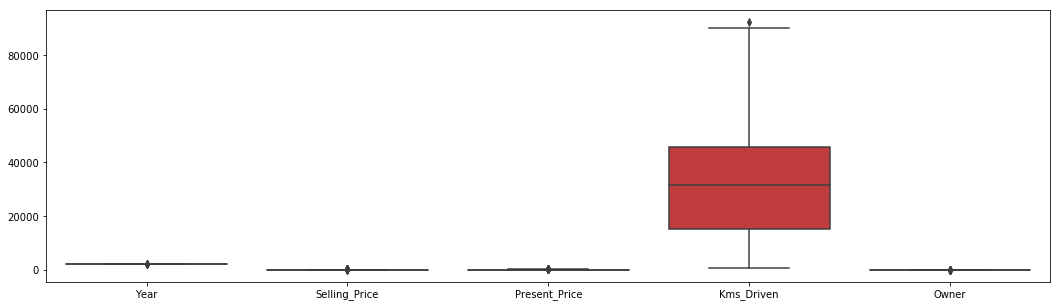

In [16]:
plt.figure(figsize = (18,5))
sn.boxplot(data=final_dataset[final_dataset['Kms_Driven']<UL])
plt.show()

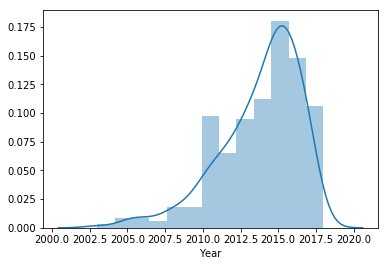

In [17]:
sn.distplot(final_dataset['Year'])

In [18]:
final_dataset['Current Year']=2020

In [19]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [20]:
# How many years car is old so that how you can do currentYear subtract Year of buying[Year]
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year']

In [21]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


Text(0,0.5,'Frequency Count')

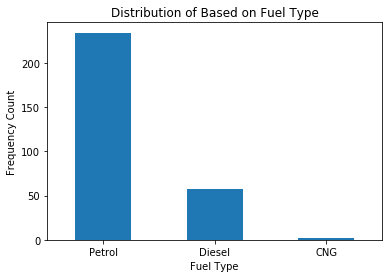

In [22]:
count_fuelTye = pd.value_counts(final_dataset['Fuel_Type'], sort = True)

count_fuelTye.plot(kind = 'bar', rot=0,)

plt.title("Distribution of Based on Fuel Type")

plt.xticks(range(3))

plt.xlabel("Fuel Type")

plt.ylabel("Frequency Count")

Petrol    234
Diesel     57
CNG         2
Name: Fuel_Type, dtype: int64


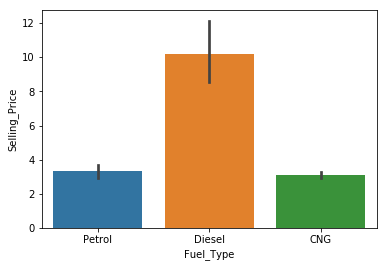

In [23]:
print(final_dataset.Fuel_Type.value_counts())
ax = sn.barplot(x="Fuel_Type", y="Selling_Price", data=final_dataset)

Diesel cars are more expensive then Petrol and CNG, look same Selling price both(Petrol,CNG)

Text(0,0.5,'Frequency Count')

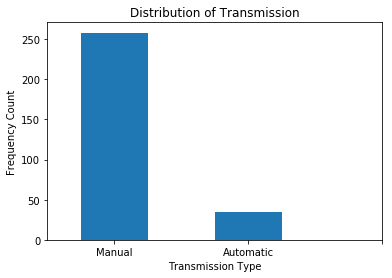

In [24]:
count_Transmission = pd.value_counts(final_dataset['Transmission'], sort = True)

count_Transmission.plot(kind = 'bar', rot=0,)

plt.title("Distribution of Transmission")

plt.xticks(range(3))

plt.xlabel("Transmission Type")

plt.ylabel("Frequency Count")

we have Transmission Feature  in which have two Clesses Manual and Automatic, Manual have High Frequency and on the other side Automatic Very less number of cars  

How many cars are avaliable Dealer and Individual: 
 Dealer        192
Individual    101
Name: Seller_Type, dtype: int64


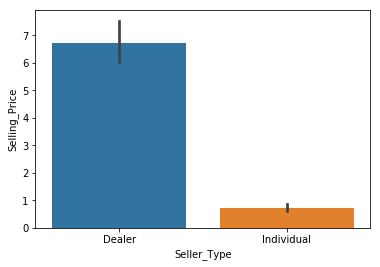

In [25]:
print("How many cars are avaliable Dealer and Individual: \n",final_dataset.Seller_Type.value_counts())
ax = sn.barplot(x="Seller_Type", y="Selling_Price", data=final_dataset)

Above we can see Car sold by the Dealer have Higher Price compar to Individual

In [26]:
# now we dont need to Year and also Current Year feature so drop it
final_dataset.drop(['Year','Current Year'],axis=1,inplace=True)

In [27]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [28]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [29]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [30]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.886687,0.122652,-0.100128,-0.232258,0.542272,-0.530025,-0.565819,-0.373345
Present_Price,0.886687,1.000000,0.346187,-0.091886,0.029823,0.459041,-0.451042,-0.541332,-0.316645
Kms_Driven,0.122652,0.346187,1.000000,-0.012454,0.592449,0.291767,-0.296033,-0.357234,0.018277
Owner,-0.100128,-0.091886,-0.012454,1.000000,0.125386,-0.044894,0.047515,0.100971,0.069236
no_year,-0.232258,0.029823,0.592449,0.125386,1.000000,-0.076604,0.070599,0.013293,0.075555
Fuel_Type_Diesel,0.542272,0.459041,0.291767,-0.044894,-0.076604,1.000000,-0.978731,-0.356444,-0.084835
Fuel_Type_Petrol,-0.530025,-0.451042,-0.296033,0.047515,0.070599,-0.978731,1.000000,0.364190,0.077471
Seller_Type_Individual,-0.565819,-0.541332,-0.357234,0.100971,0.013293,-0.356444,0.364190,1.000000,0.090003
Transmission_Manual,-0.373345,-0.316645,0.018277,0.069236,0.075555,-0.084835,0.077471,0.090003,1.000000


In [31]:
import seaborn as sn

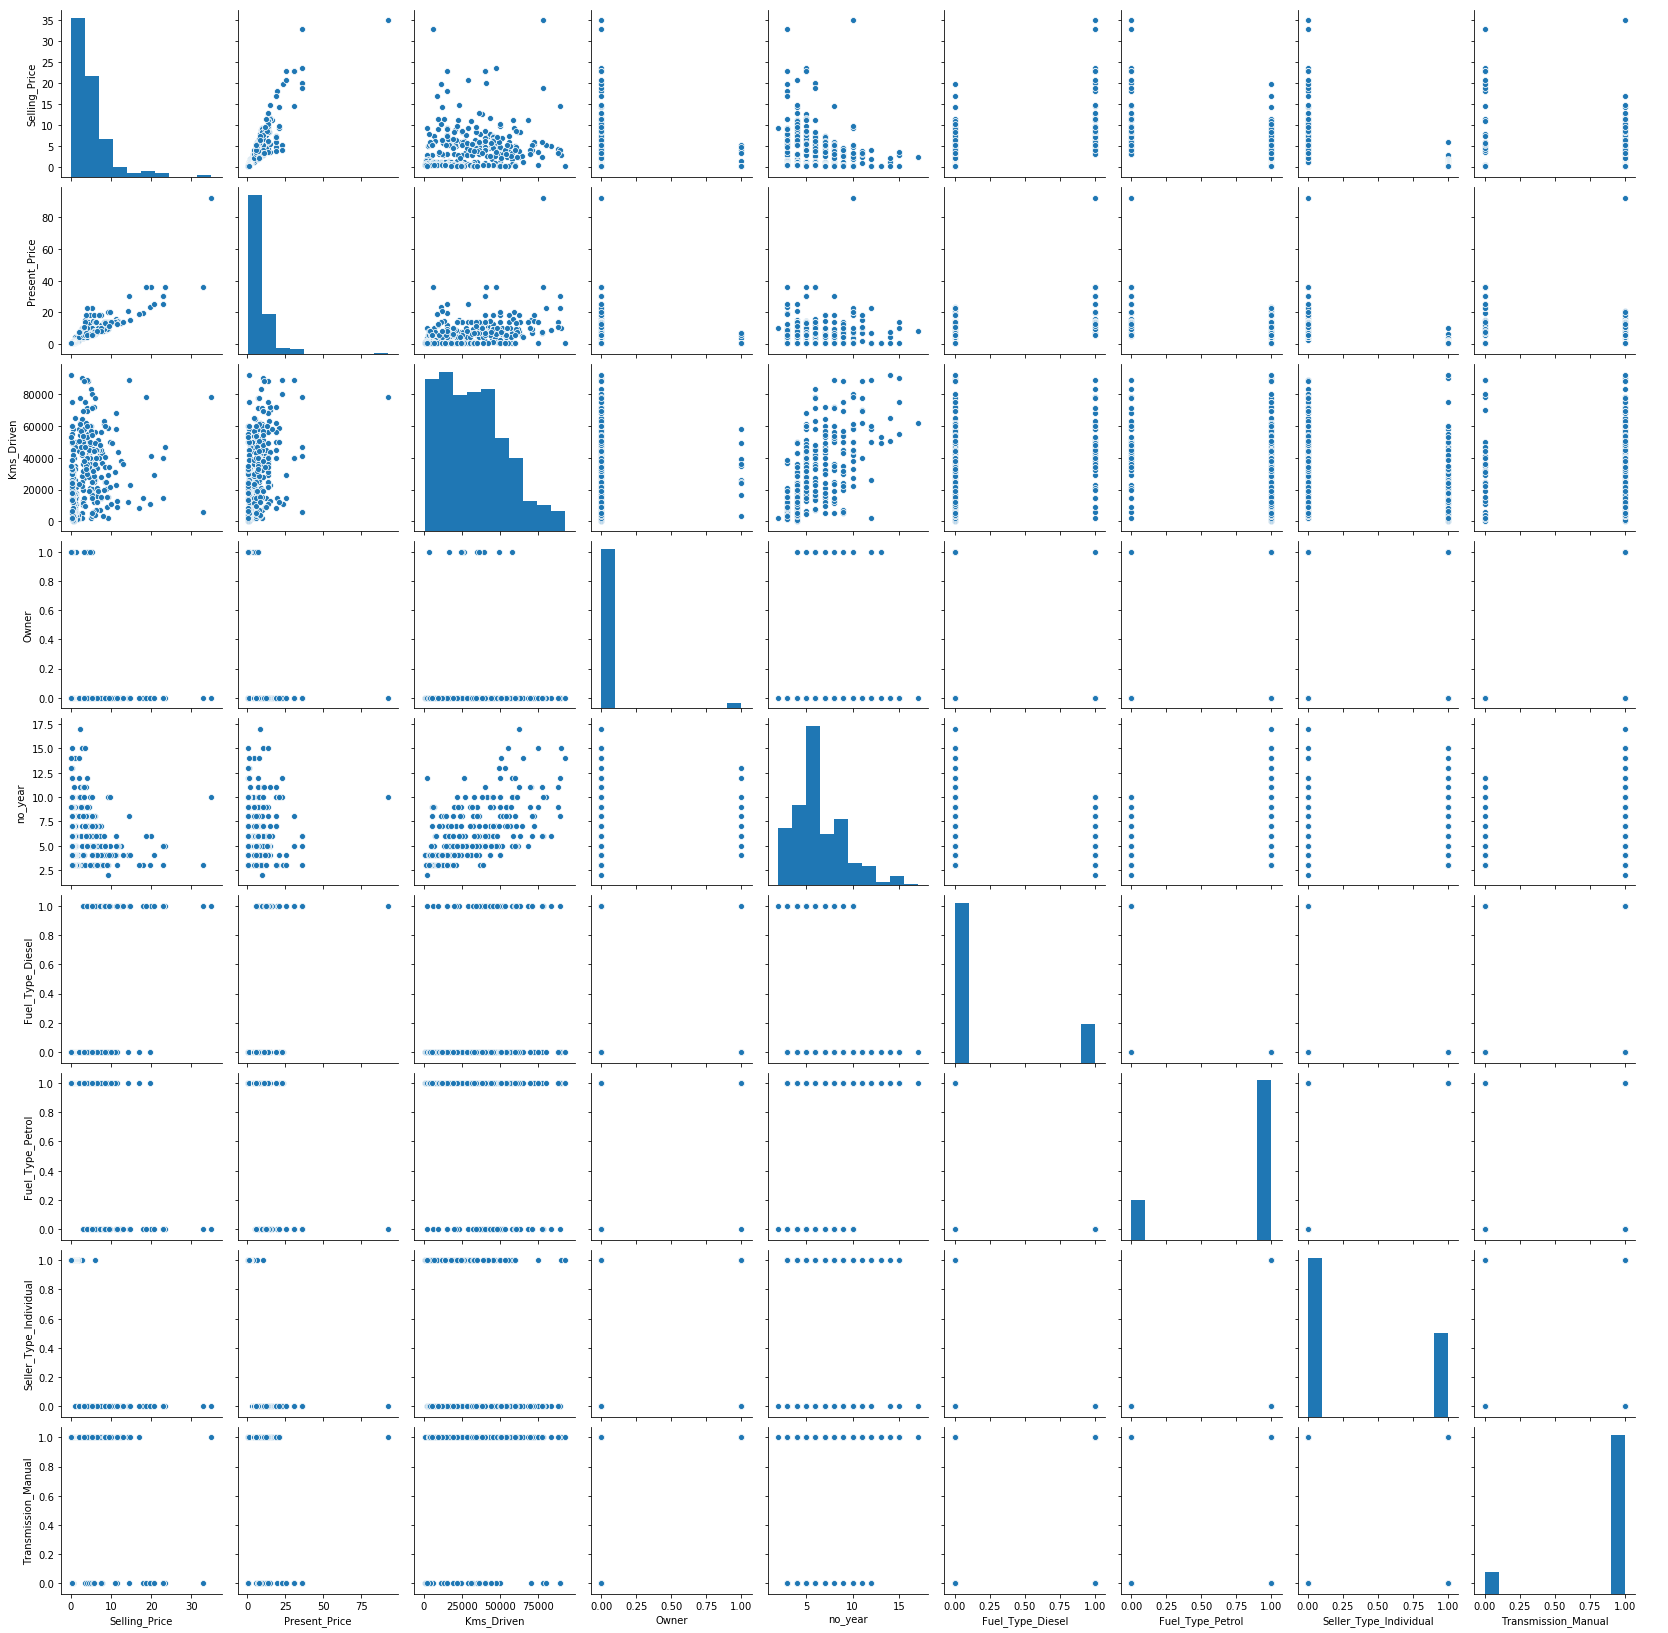

In [32]:
sn.pairplot(final_dataset)

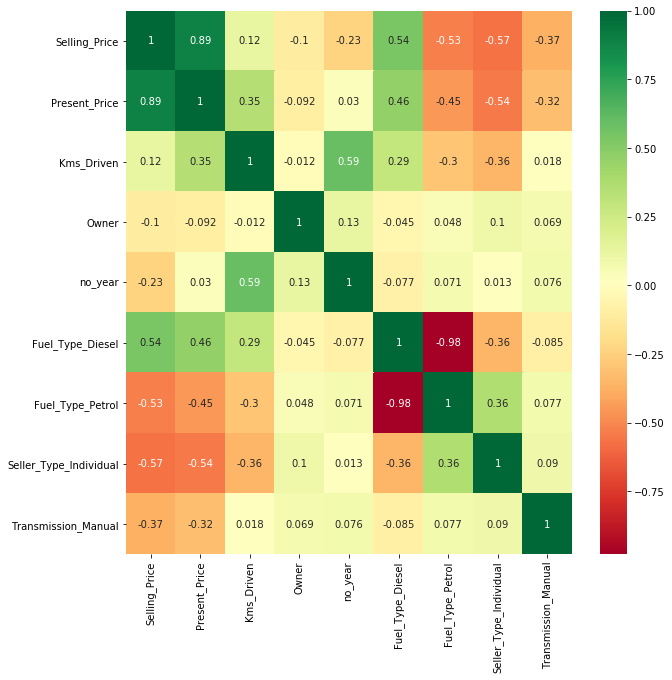

In [33]:
#get correlations of each features in dataset
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sn.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [34]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [35]:
X['Owner'].unique()

array([0, 1], dtype=int64)

In [36]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [37]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [38]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [39]:
print(model.feature_importances_)

[3.94995089e-01 3.97390104e-02 2.28591700e-04 6.79024756e-02
 6.18801153e-02 7.60777290e-02 2.69274907e-01 8.99020825e-02]


* looking for most important features
* plotting the graph of feature importance for better visualisation

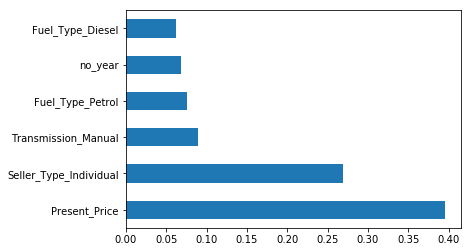

In [40]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
regressor=RandomForestRegressor()

### Hyperparameters tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [46]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [47]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [48]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [49]:
# It will take some time for selecting best param
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [50]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [51]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

#### putting best parameters for RandomForestRegressor

In [52]:
rfr = RandomForestRegressor(max_depth=20, min_samples_leaf=2,
                      min_samples_split=15, n_estimators=1100)

In [53]:
model_rf=rfr.fit(X_train,y_train)

In [54]:
predict_=model_rf.predict(X_test)

In [55]:
model_rf.score(X_test,y_test)

0.9026725510394193

#### Model Score is 90%  RandomForestRegresson 
# putting paramerets

In [56]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predict_)
R2

0.9026725510394193

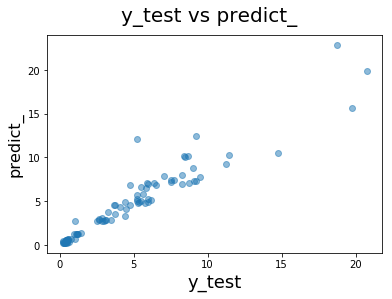

In [57]:
# Plotting y_test and predictions to understand the spread

fig = plt.figure()
plt.scatter(y_test,predict_, alpha=.5)
fig.suptitle('y_test vs predict_', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('predict_', fontsize = 16) 
plt.show()

In [58]:
df = pd.DataFrame({'Actual':y_test,"Predicted":predict_})
df.head()

,Actual,Predicted
234,5.50,5.070278
293,3.25,3.762086
217,3.15,2.834221
177,0.35,0.260925
124,0.95,1.225489


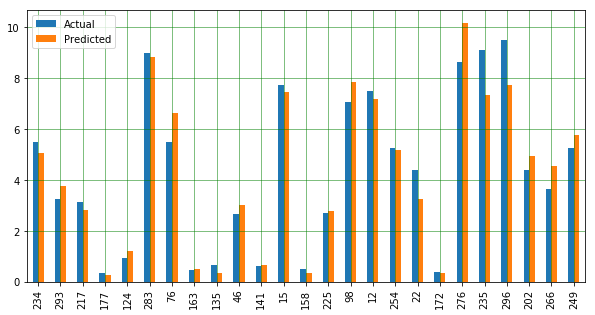

In [59]:
# difference between the Actual and predicted value

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [60]:
rf_random.best_score_
# -4.430592047602699

-4.2734746307987495

In [61]:
predictions=rf_random.predict(X_test)

#### Score is 89% RandomForestReg without param

In [62]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predictions)
R2
# 0.8678892897805003

0.8947836263037898

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predictions)
R2
# 0.8678892897805003

0.8947836263037898

below, Here we have two Values Actual and Predictes

In [65]:
df = pd.DataFrame({'Actual':y_test,"Predicted":predictions})
df.head()

,Actual,Predicted
234,5.50,5.074596
293,3.25,3.775906
217,3.15,2.827657
177,0.35,0.263271
124,0.95,1.218157


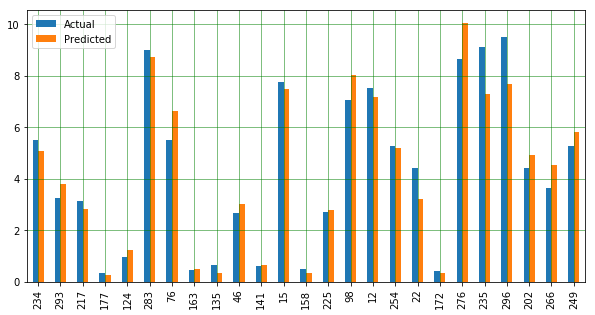

In [66]:
# difference between the Actual and predicted value

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

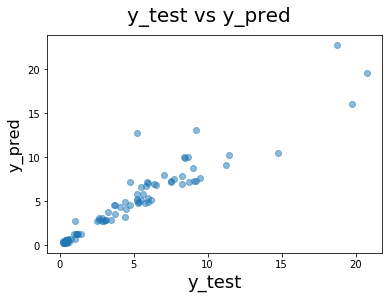

In [67]:
# Plotting y_test and predictions to understand the spread

fig = plt.figure()
plt.scatter(y_test, predictions, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

Text(0.5,0,'Errors')

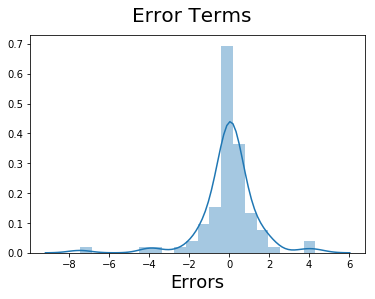

In [68]:
rf = y_test-predictions
# Plot the histogram of the error terms
fig = plt.figure()
sn.distplot((rf), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

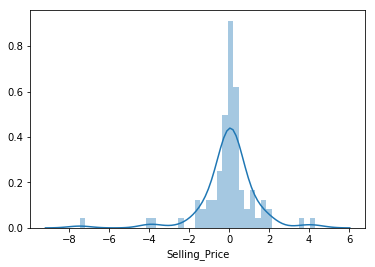

In [69]:
sn.distplot(y_test-predictions)

In [70]:
from sklearn import metrics

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7899060980103312
MSE: 1.966759369641948
RMSE: 1.4024119828502422


In [72]:
# with outliers show result and also no tuning param
# MAE: 0.8830906595298466
# MSE: 3.9509103915752966
# RMSE: 1.987689712096759

# Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
gboost_model = GradientBoostingRegressor()

In [74]:
gboost_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [75]:
y_pred = gboost_model.predict(X_test)

### Give more accurate result without choosing any parameters

In [76]:
print(r2_score(y_test, y_pred))

0.9637444339503475


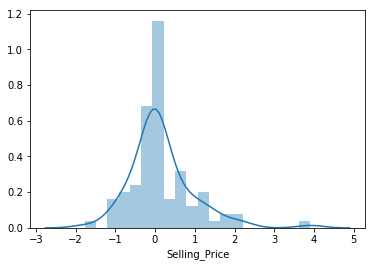

In [77]:
sn.distplot(y_test-y_pred)

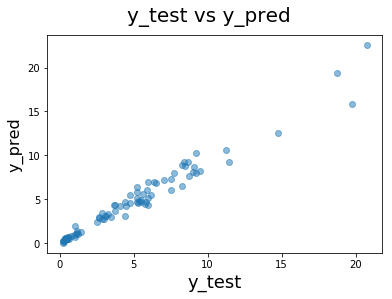

In [78]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [79]:
df_gb = pd.DataFrame({'Actual':y_test,"Predicted":y_pred})
df_gb.head()

,Actual,Predicted
234,5.50,4.741657
293,3.25,3.284230
217,3.15,3.097631
177,0.35,0.481508
124,0.95,0.927515


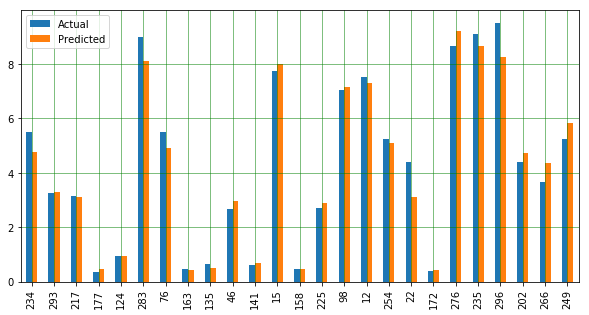

In [80]:
# difference between the Actual and predicted value

df_gb = df_gb.head(25)
df_gb.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [81]:
#Randomized search CV for gradient boosting
#Number of treers in random forest
n_estimators =[int(x) for x in np.linspace(100,1200,num = 12)]
#Learning rate
learning_rate = [0.01, 0.02, 0.05, 0.1, 0.2]
subsample = [0.05, 0.06, 0.08, 0.09, 0.1]
criterion = ['mse', 'rmse', 'friedman_mse']
#Number of features to consider at every split
max_features =["auto", "sqrt"]

In [82]:
#creating gradient boosting grid
gb_grid = {'n_estimators' : n_estimators,
           'learning_rate' : learning_rate,
           'subsample' : subsample,
           'max_depth' : max_depth,
           'max_features' : max_features}
print(gb_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2], 'subsample': [0.05, 0.06, 0.08, 0.09, 0.1], 'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt']}


In [83]:
final_gb_model = RandomizedSearchCV(estimator = gboost_model, param_distributions=gb_grid,
                                 scoring='neg_mean_squared_error', n_iter = 20,
                                 cv = 5, verbose = 2, random_state = 42, n_jobs =1)

In [84]:
final_gb_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2, total=   0.8s
[CV] subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2, total=   0.9s
[CV] subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2 
[CV]  subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2, total=   0.8s
[CV] subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2 
[CV]  subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2, total=   0.9s
[CV] subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2 
[CV]  subsample=0.1, n_estimators=1100, max_features=auto, max_depth=15, learning_rate=0.2, total=   0.8s
[CV] subsample=0.08, n_estimators=600, max_features=auto, max_depth=30, learning_rate=0.2 
[CV]  subsample=0.08, n_estimators=600, max_features=auto, max_depth=30, learning_rate=0.2, total=   0.5s
[CV] subsample=0.08, n_estimators=600, max_features=auto, max_depth=30, learning_rate=0.2 
[CV]  subsample

[CV]  subsample=0.1, n_estimators=200, max_features=auto, max_depth=5, learning_rate=0.1, total=   0.2s
[CV] subsample=0.1, n_estimators=200, max_features=auto, max_depth=5, learning_rate=0.1 
[CV]  subsample=0.1, n_estimators=200, max_features=auto, max_depth=5, learning_rate=0.1, total=   0.2s
[CV] subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01 
[CV]  subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01, total=   0.7s
[CV] subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01 
[CV]  subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01, total=   0.7s
[CV] subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01 
[CV]  subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01, total=   0.6s
[CV] subsample=0.06, n_estimators=1000, max_features=sqrt, max_depth=20, learning_rate=0.01 
[CV]  s

[CV]  subsample=0.05, n_estimators=300, max_features=auto, max_depth=10, learning_rate=0.01, total=   0.2s
[CV] subsample=0.05, n_estimators=300, max_features=auto, max_depth=10, learning_rate=0.01 
[CV]  subsample=0.05, n_estimators=300, max_features=auto, max_depth=10, learning_rate=0.01, total=   0.2s
[CV] subsample=0.05, n_estimators=300, max_features=auto, max_depth=10, learning_rate=0.01 
[CV]  subsample=0.05, n_estimators=300, max_features=auto, max_depth=10, learning_rate=0.01, total=   0.2s
[CV] subsample=0.05, n_estimators=300, max_features=auto, max_depth=10, learning_rate=0.01 
[CV]  subsample=0.05, n_estimators=300, max_features=auto, max_depth=10, learning_rate=0.01, total=   0.2s
[CV] subsample=0.05, n_estimators=300, max_features=auto, max_depth=10, learning_rate=0.01 
[CV]  subsample=0.05, n_estimators=300, max_features=auto, max_depth=10, learning_rate=0.01, total=   0.2s
[CV] subsample=0.05, n_estimators=200, max_features=auto, max_depth=15, learning_rate=0.05 
[CV] 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   49.6s finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=20,
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.2],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.05, 0.06, 0.08, 0.09,
                                                      0.1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [85]:
final_gb_model.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='auto',
                          n_estimators=900, subsample=0.08)

In [86]:
final_gb_model.best_params_

{'subsample': 0.08,
 'n_estimators': 900,
 'max_features': 'auto',
 'max_depth': 5,
 'learning_rate': 0.05}

In [87]:
gbr_model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='auto',
                          n_estimators=900, subsample=0.08)

In [88]:
gbr_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features='auto',
                          n_estimators=900, subsample=0.08)

In [89]:
pred= gbr_model.predict(X_test)

### GradientBoostingRegressor  score is 91% GBR model is given better result then RandomForestReg

In [90]:

print(r2_score(y_test, pred))

0.9140559608966077


# 91%

In [91]:
gbr_model.score(X_test,y_test)

0.9140559608966077

In [92]:
df_1 = pd.DataFrame({'Actual':y_test,"Predicted":pred})
df_1.head()

,Actual,Predicted
234,5.50,4.849147
293,3.25,3.780744
217,3.15,3.113496
177,0.35,0.205700
124,0.95,0.725943


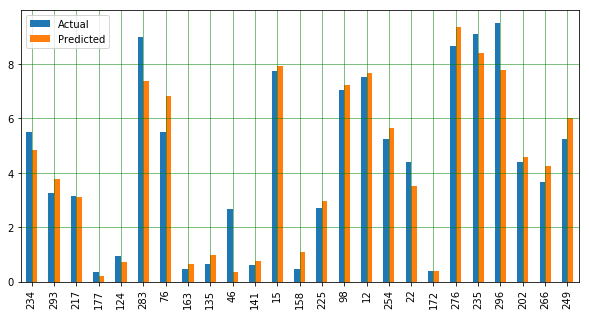

In [93]:
# difference between the Actual and predicted value

df_1 = df_1.head(25)
df_1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.731353052118607
MSE: 1.606510833185645
RMSE: 1.2674820839702805


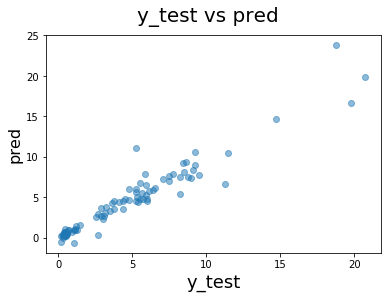

In [95]:
# Plotting y_test and pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, pred, alpha=.5)
fig.suptitle('y_test vs pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('pred', fontsize = 16) 
plt.show()

Text(0.5,0,'Errors')

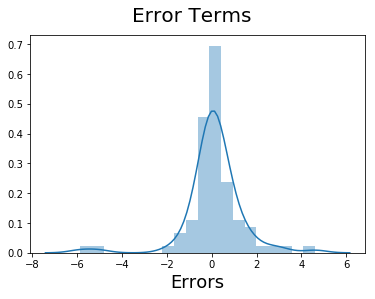

In [96]:
# Plot the histogram of the error terms
fig = plt.figure()
sn.distplot((y_test-pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [98]:
import pickle
# open a file, where you ant to store the data
file = open('Gradient_Boosting_Regressor_model.pkl', 'wb')

# dump information to that file
pickle.dump(gboost_model, file)

In [99]:
import xgboost as xgb

## Fitting XGB regressor

In [100]:
#Fitting XGB regressor 
model = xgb.XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
xpred = model.predict(X_test)

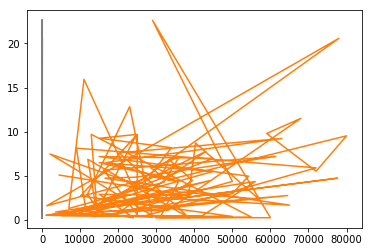

In [110]:
plt.plot(X_test, xpred)

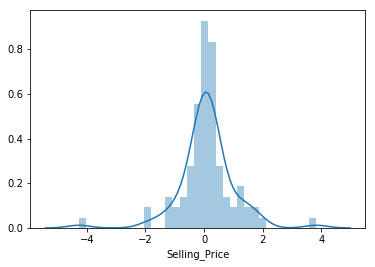

In [103]:
sn.distplot(y_test-xpred)

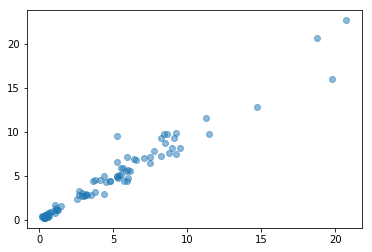

In [105]:
plt.scatter(y_test, xpred, alpha=.5)

In [106]:
print(r2_score(y_test, xpred))

0.9529358069873948


In [107]:
df_x = pd.DataFrame({'Actual':y_test,"Predicted":xpred})
df_x.head()

,Actual,Predicted
234,5.50,5.066978
293,3.25,2.754834
217,3.15,2.874903
177,0.35,0.213996
124,0.95,1.001606


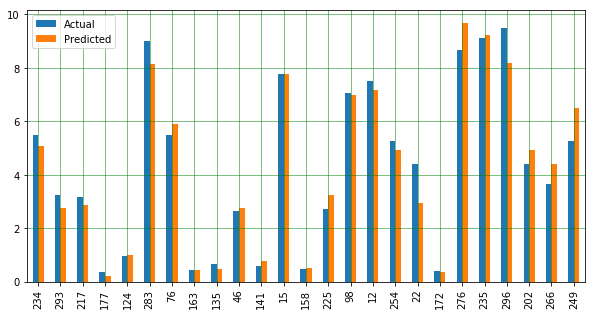

In [108]:
# difference between the Actual and predicted value

df_x = df_x.head(25)
df_x.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Conclusion
* Gradient Boost gives better RMSE than Random Forest
* XGB regressor also gives better result 
* we can say XGB and GBR both the same score both better for modeling